In [1]:
import numpy as np
from readFields import read_data
varList=['qv','qc','qr','qi','qs','qg','th','qv_new','qc_new','qr_new','qi_new',\
         'qs_new','qg_new','th_new','press','dz']
import pickle
import numpy as np
inputScalers=pickle.load(open("inputScalers_1M_cell.pkl","rb"))
outputScalers=pickle.load(open("outputScalers_1M_cell.pkl","rb"))
import sys
sys.path.append("/Users/mgrecu/WDomains/MCS_OK")
from fscale import fscale1,update_var1, fscale1d,update_var1d
inputVars=["qc","qr","qi","qs","qg","qv","press","temp","dz"]
outputVars=["qc_tend","qr_tend","qi_tend","qs_tend","qg_tend","qv_tend","temp_tend"]
qcm,qcs=inputScalers["qc"]
qrm,qrs=inputScalers["qr"]
qim,qis=inputScalers["qi"]
qsm,qss=inputScalers["qs"]
qgm,qgs=inputScalers["qg"]
qvm,qvs=inputScalers["qv"]
from keras.models import load_model
model=load_model("unet1D_MP_model_1M_gc.h5")
#unet1D_MP_model_1M_gc.h5
xL=[]
yL=[]
itemp=varList.index('th')
ipress=varList.index('press')
iqc=varList.index('qc')
iqc_new=varList.index('qc_new')
iqi=varList.index('qi')
iqi_new=varList.index('qi_new')
iqv=varList.index('qv')
iqr=varList.index('qr')
iqr_new=varList.index('qr_new')
iqg=varList.index('qg')
iqg_new=varList.index('qg_new')
iqs=varList.index('qs')
iqs_new=varList.index('qs_new')
ind=np.sorted([iqc,iqr,iqi,iqs,iqg,iqc_new,iqr_new,iqi_new,iqs_new,iqg_new])
xL_cc=[]
xL_ic=[]
xL_hyd=[]
for itile in range(10):
    for itime in range(3):
        fname='tile_%2.2i/output%3.3i.bin'%(itile+1,itime+1)
        dims=open('tile_%2.2i/output%3.3i'%(itile+1,itime+1),'r').readline().split()
        nx=int(dims[0])
        ny=int(dims[1])
        nz=72
        fields=read_data(fname, nx,ny)
        outVars=[]
        x1L=[]
        y1L=[]
        a=np.nonzero(fields[iqc_new,:,:,:]-fields[iqc,:,:,:]>0)
        #print(len(a[0])/(nx*ny*72))
        p1d=fields[ipress,:,:,:][a]
        t1d=fields[itemp,:,:,:][a]
        qv1d=fields[iqv,:,:,:][a]
        dqc=fields[iqc_new,:,:,:][a]-fields[iqc,:,:,:][a]
        xL_cc.extend(np.transpose([p1d,t1d*(p1d/1e5)**(287/1004.),qv1d,dqc]))
        a=np.nonzero(fields[iqi_new,:,:,:]-fields[iqi,:,:,:]>0)
        #print(len(a[0])/(nx*ny*72))
        p1d=fields[ipress,:,:,:][a]
        t1d=fields[itemp,:,:,:][a]
        qv1d=fields[iqv,:,:,:][a]
        dqi=fields[iqi_new,:,:,:][a]-fields[iqi,:,:,:][a]
        xL_ic.extend(np.transpose([p1d,t1d*(p1d/1e5)**(287/1004.),qv1d,dqi]))
        a=np.nonzero(fields[ind,:,:,:].sum(axis=0)>0)
        xL_hyd.extend(np.transpose([fields[ipress,:,:,:][a],\
                                fields[itemp,:,:,:][a]*(fields[ipress,:,:,:][a]/1e5)**(287/1004.),\
                                fields[iqv,:,:,:][a],fields[iqc,:,:,:][a],fields[iqr,:,:,:][a],fields[iqi,:,:,:][a],\
                                fields[iqs,:,:,:][a],fields[iqg,:,:,:][a],\
                                fields[iqv_new,:,:,:][a],fields[iqc_new,:,:,:][a],fields[iqr_new,:,:,:][a],\
                                fields[iqi_new,:,:,:][a],fields[iqs_new,:,:,:][a],fields[iqg_new,:,:,:][a]]))

 tile_01/output001.bin
 tile_01/output002.bin
 tile_01/output003.bin
 tile_02/output001.bin
 tile_02/output002.bin
 tile_02/output003.bin
 tile_03/output001.bin
 tile_03/output002.bin
 tile_03/output003.bin
 tile_04/output001.bin
 tile_04/output002.bin
 tile_04/output003.bin
 tile_05/output001.bin
 tile_05/output002.bin
 tile_05/output003.bin
 tile_06/output001.bin
 tile_06/output002.bin
 tile_06/output003.bin
 tile_07/output001.bin
 tile_07/output002.bin
 tile_07/output003.bin
 tile_08/output001.bin
 tile_08/output002.bin
 tile_08/output003.bin
 tile_09/output001.bin
 tile_09/output002.bin
 tile_09/output003.bin
 tile_10/output001.bin
 tile_10/output002.bin
 tile_10/output003.bin


0


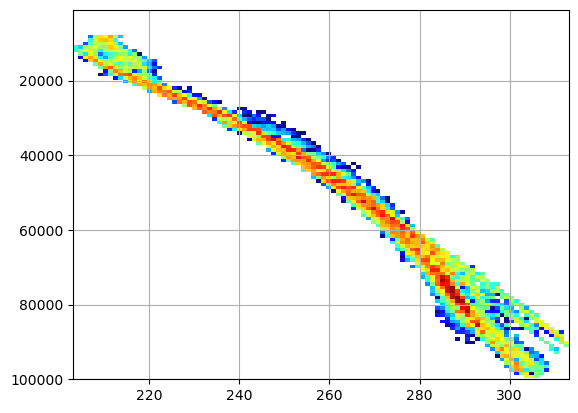

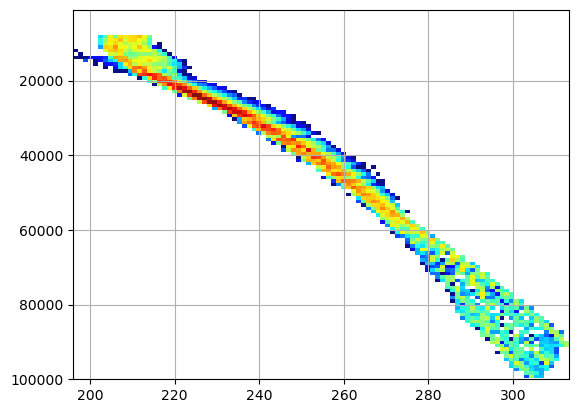

In [46]:
print(len(xL))
xL_cc=np.array(xL_cc)
xL_ic=np.array(xL_ic)
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
plt.subplot(111)
h2d=plt.hist2d(xL_cc[:,1],xL_cc[:,0],bins=100,norm=LogNorm(),cmap='jet',alpha=0.95)
#plt.contour(h2d[1][:-1],h2d[2][:-1],h2d[0].T)
plt.ylim([1e5,1e3])
plt.grid()
plt.figure()
plt.subplot(111)
h2d_2=plt.hist2d(xL_ic[:,1],xL_ic[:,0],bins=100,norm=LogNorm(),cmap='jet',alpha=0.95)
#plt.contour(h2d[1][:-1],h2d[2][:-1],h2d[0].T)
plt.ylim([1e5,1e3])
plt.grid()

(100000.0, 1000.0)

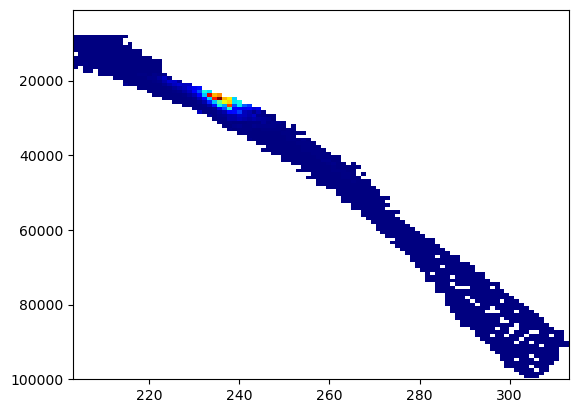

In [37]:
dTemp=h2d[1][1]-h2d[1][0]
Tmin=h2d[1][0]
Tmax=h2d[1][-1]
dPress=h2d[2][1]-h2d[2][0]
Pmin=h2d[2][0]
Pmax=h2d[2][-1]
countR=np.zeros((100,100))
qi_meanICE=np.zeros((100,100),float)
qc_meanICE=np.zeros((100,100),float)
qv_meanICE=np.zeros((100,100),float)
for i,x in enumerate(xL_ic):
    i1=int((x[0]-Pmin)/dPress)
    i2=int((x[1]-Tmin)/dTemp)
    if i1<0 or i1>99 or i2<0 or i2>99:
        continue
    countR[i1,i2]+=1
    qv_meanICE[i1,i2]+=x[2]
    qi_meanICE[i1,i2]+=x[3]

a=np.nonzero(countR>0)
qv_meanICE[a]=qv_meanICE[a]/countR[a]
qi_meanICE[a]=qi_meanICE[a]/countR[a]
a=np.nonzero(countR==0)
qv_meanICE[a]=np.nan
qi_meanICE[a]=np.nan

plt.figure()
plt.subplot(111)
plt.pcolormesh(h2d[1],h2d[2],qi_meanICE,cmap='jet')
plt.ylim([1e5,1e3])



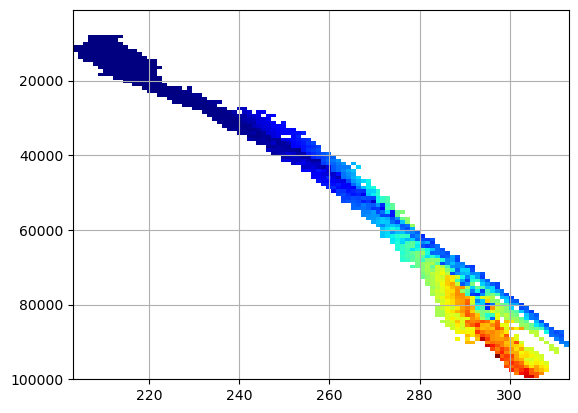

In [42]:
countRW=np.zeros((100,100))
qi_meanW=np.zeros((100,100),float)
qc_meanW=np.zeros((100,100),float)
qv_meanW=np.zeros((100,100),float)
for i,x in enumerate(xL_cc):
    i1=int((x[0]-Pmin)/dPress)
    i2=int((x[1]-Tmin)/dTemp)
    if i1<0 or i1>99 or i2<0 or i2>99:
        continue
    countRW[i1,i2]+=1
    qv_meanW[i1,i2]+=x[2]
    qi_meanW[i1,i2]+=x[3]

a=np.nonzero(countRW>0)
qv_meanW[a]=qv_meanW[a]/countRW[a]
qi_meanW[a]=qi_meanW[a]/countRW[a]
a=np.nonzero(countRW==0)
qv_meanW[a]=np.nan
qi_meanW[a]=np.nan

plt.figure()
plt.subplot(111)
plt.pcolormesh(h2d[1],h2d[2],qv_meanW,cmap='jet')
plt.ylim([1e5,1e3])
plt.grid()

(100000.0, 1000.0)

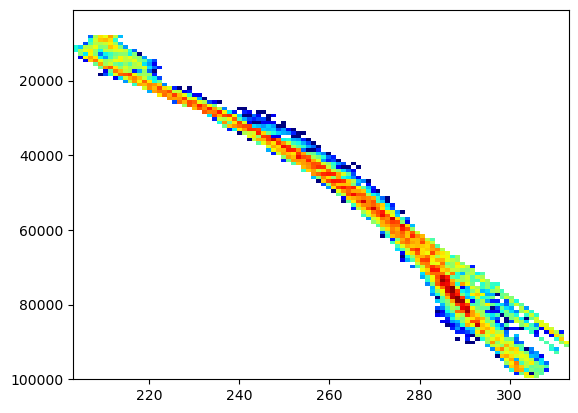

In [45]:
plt.figure()
plt.pcolormesh(h2d[1],h2d[2],countRW,cmap='jet',norm=LogNorm())
plt.ylim([1e5,1e3])